# Project Configuration 
This section will setup the project this includes:
- Installing the required libraries
- Loading the dataset
- EDA
- Data Preprocessing

After this section, the dataset will be used to train two different models: KNN and Logistic Regression.

Both models will be configured with different hyperparameters, to see which hyperparameters are the best for each model.

A comparison will be made between the two models, to see which model is the best for this dataset. The metrics used for this comparison are: accuracy, precision, recall and f1-score.

## 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Setup visualization config
sns.set()

## 2. Loading the dataset and EDA (Exploratory Data Analysis)
Each piece of code is in a separate cell because otherwise it will only show the last one.

In [5]:
# Load the diabetes dataset
diabetes_data = pd.read_csv('../data/diabetes.csv')
# Show first 5 rows of the dataset and useful information
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From initial exploration we can see that some data has a 0 where it makes no sense. For example, Glucose, Blood Pressure, SkinThickness, and BMI cannot be 0.

In [12]:
diabetes_data = diabetes_data[(diabetes_data['Glucose'] != 0) & (diabetes_data['BloodPressure']!= 0) & (diabetes_data['SkinThickness']!= 0) & (diabetes_data['BMI']!= 0)]
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,532.0,3.516917,3.312036,0.000,1.00000,2.000,5.0000,17.00
Glucose,532.0,121.030075,30.999226,56.000,98.75000,115.000,141.2500,199.00
BloodPressure,532.0,71.505639,12.310253,24.000,64.00000,72.000,80.0000,110.00
SkinThickness,532.0,29.182331,10.523878,7.000,22.00000,29.000,36.0000,99.00
Insulin,532.0,114.988722,123.007555,0.000,0.00000,91.500,165.2500,846.00
BMI,532.0,32.890226,6.881109,18.200,27.87500,32.800,36.9000,67.10
DiabetesPedigreeFunction,532.0,0.502966,0.344546,0.085,0.25875,0.416,0.6585,2.42
Age,532.0,31.614662,10.761584,21.000,23.00000,28.000,38.0000,81.00
Outcome,532.0,0.332707,0.471626,0.000,0.00000,0.000,1.0000,1.00


## Visualiation of Outliers
Since there are a lot of columns, we're going to split the data into two groups to visualize the outliers, if any.

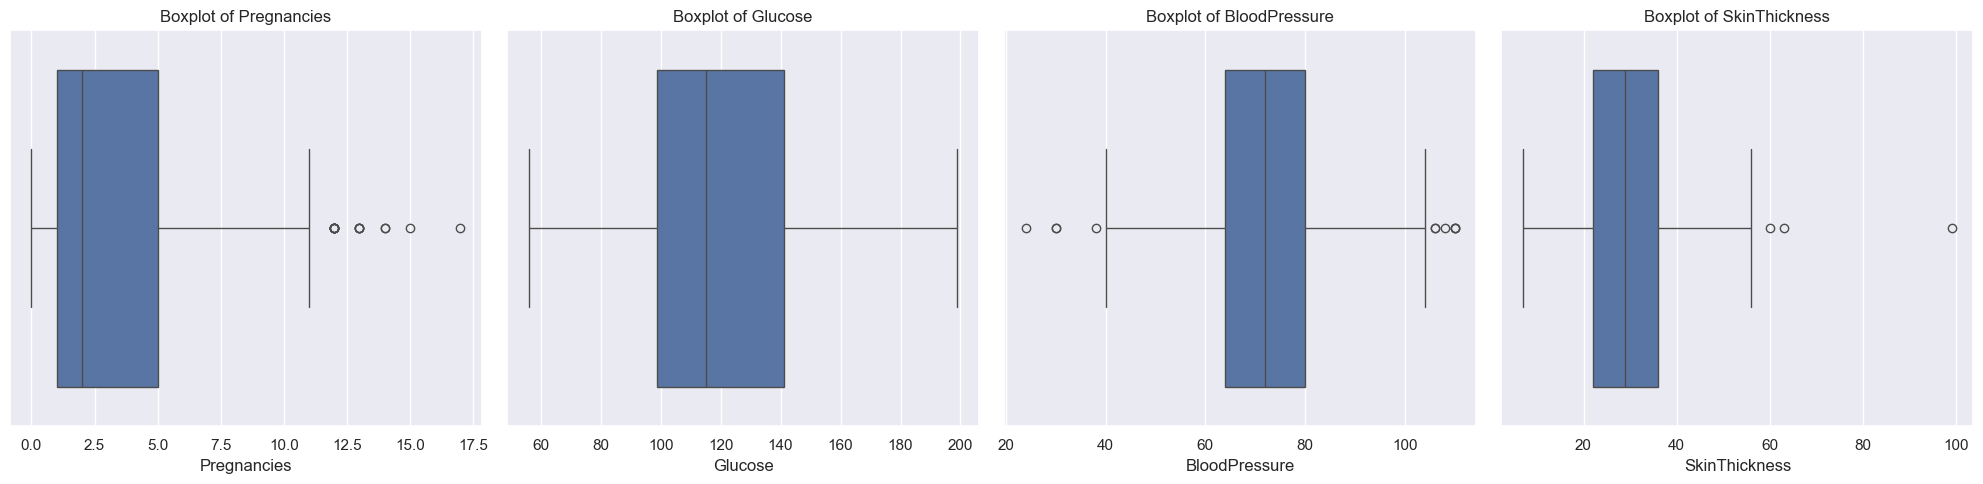

In [29]:
plt.figure(figsize=(20, 5))
first_group_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
second_group_check = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, col in enumerate(first_group_check, 1):
    plt.subplot(1, len(first_group_check), i)
    sns.boxplot(x=diabetes_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

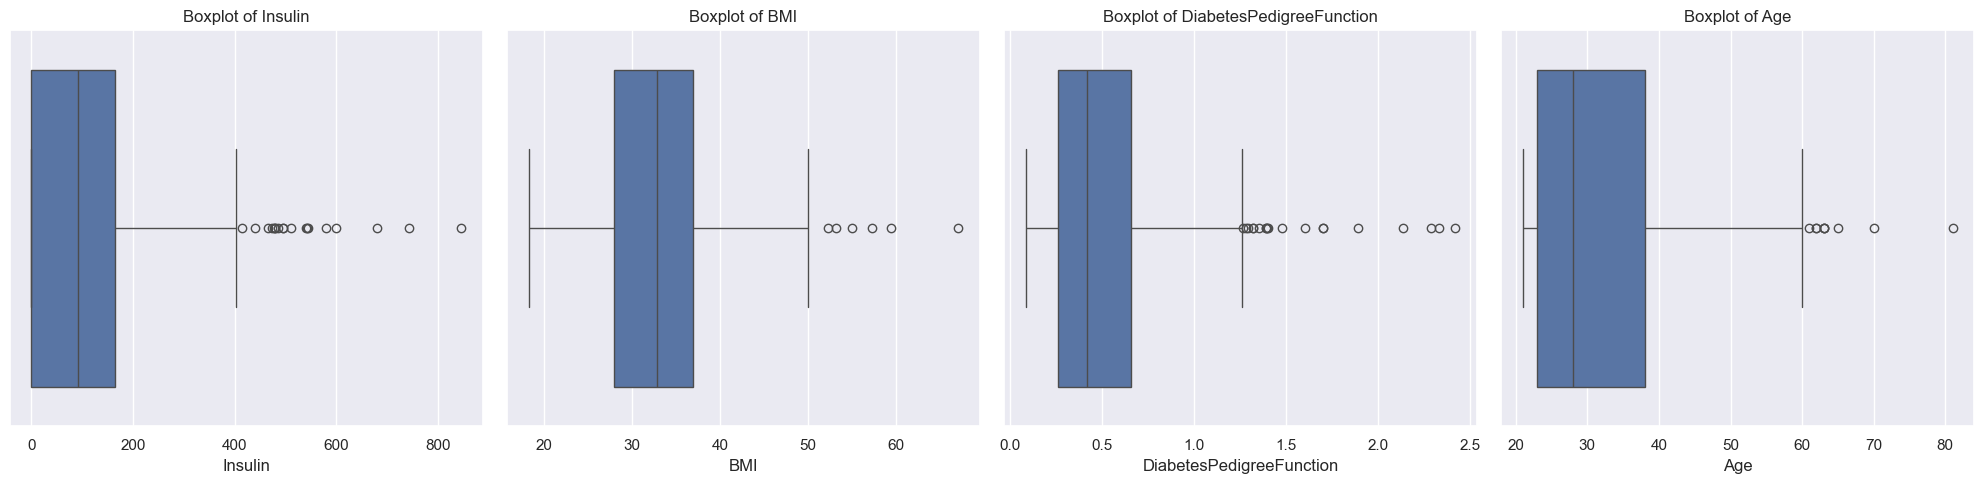

In [31]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(second_group_check, 1):
    plt.subplot(1, len(second_group_check), i)
    sns.boxplot(x=diabetes_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Find any outliers using IQR and visualize them with a scatter plot.

In [33]:
def find_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

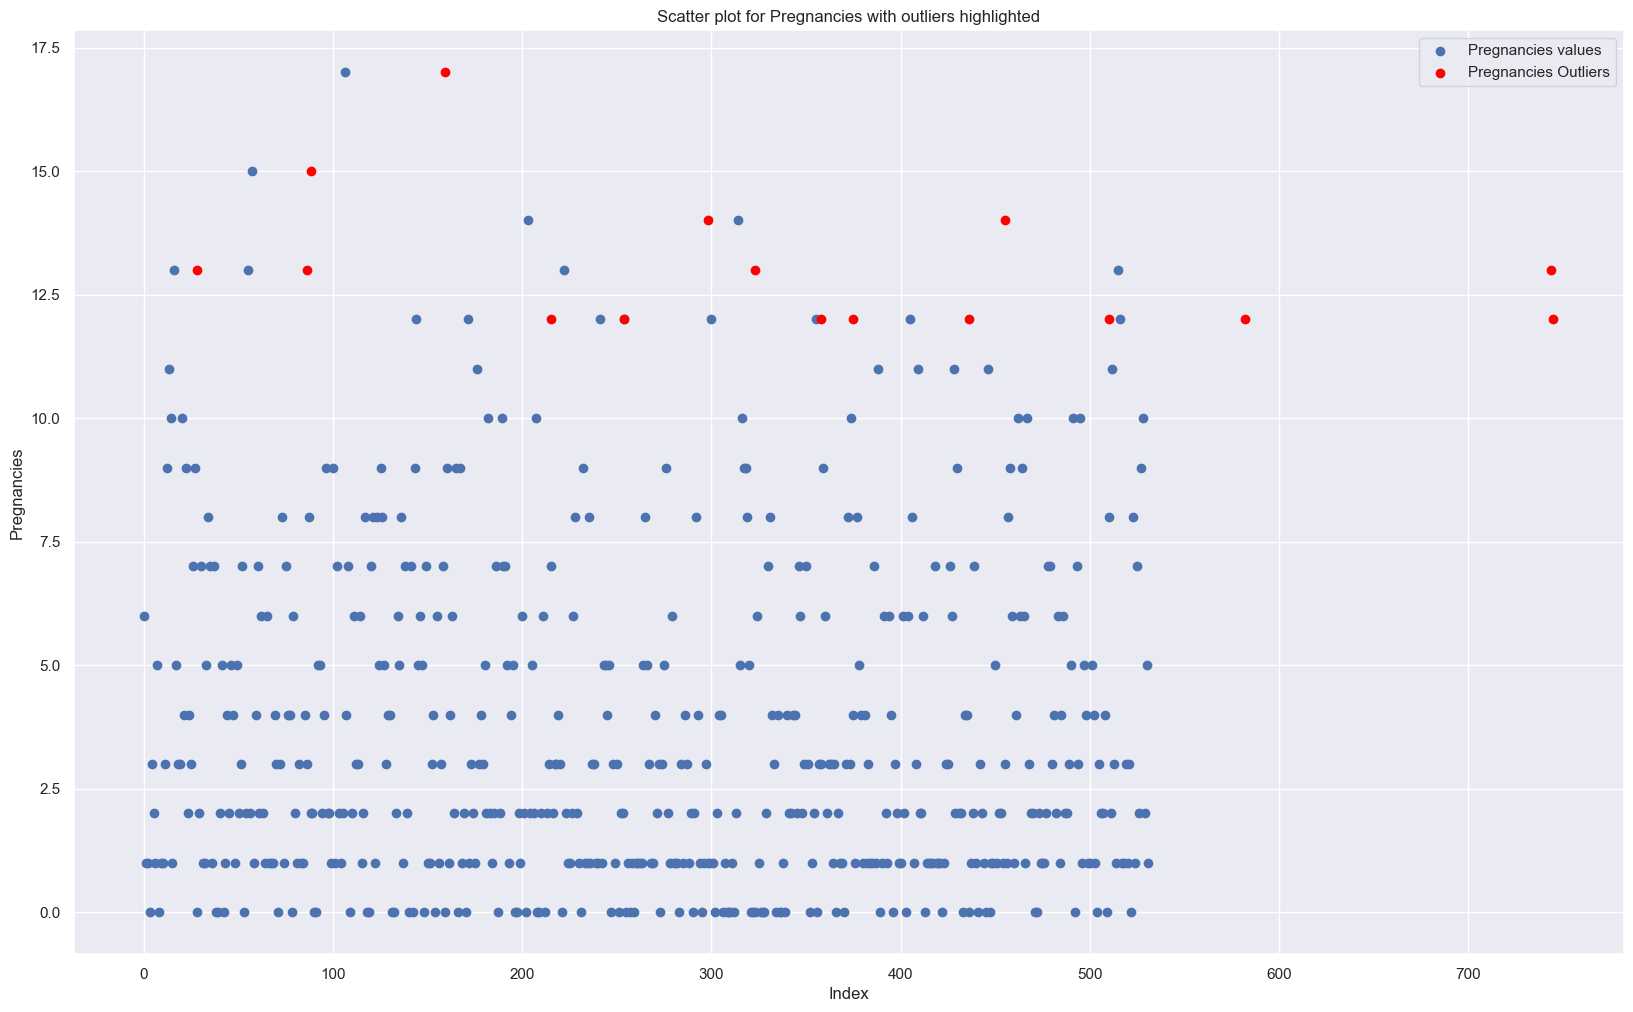

In [ ]:
outliers_first_group = []
outliers_second_group = []

for column in first_group_check:
    outliers, lower_bound, upper_bound = find_outliers_iqr(diabetes_data, column)
    outliers_first_group.append((outliers, lower_bound, upper_bound))

# TODO: figure out how to plot the outliers properly, if it is needed to do one by one or all together
plt.figure(figsize=(20, 12))
# for i, column in enumerate(first_group_check):
#     plt.scatter(range(len(diabetes_data)), diabetes_data[column], label=f'{column} values')
#     plt.scatter(outliers_first_group[i][0].index, outliers_first_group[i][0][column], color='red', label=f'{column} Outliers')
#     plt.title(f'Scatter plot for {column} with outliers highlighted')
#     plt.xlabel('Index')
#     plt.ylabel(column)
#     plt.legend()

# plt.show()


plt.scatter(range(len(diabetes_data)), diabetes_data['Pregnancies'], label='Pregnancies values')
plt.scatter(outliers_first_group[0][0].index, outliers_first_group[0][0]['Pregnancies'], color='red', label='Pregnancies Outliers')
plt.title('Scatter plot for Pregnancies with outliers highlighted')
plt.xlabel('Index')
plt.ylabel('Pregnancies')
plt.legend()
plt.show()



In [43]:
for column in second_group_check:
    outliers, lower_bound, upper_bound = find_outliers_iqr(diabetes_data, column)
    outliers_second_group.append((outliers, lower_bound, upper_bound))
    